# College Admission Classification Example

Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


Read the data from the csv file   

In [ ]:
# This dataset uses the (.) to indicate decimals
dataset = pd.read_csv("College-Admission-Scores.csv",delimiter=";",decimal=".")
# Organize the dataset into the format of numpy that handles arrays
data = dataset.to_numpy()
print(data)


In [4]:
# Understand the data as you check it shape
print(data.shape)


(150, 2)


In [5]:
# Extract the indicated two specific columns base on indexing
x = data[:,0]
y = data[:,1]

Plot the data

In [6]:
x_reshape = x.reshape(-1,1)

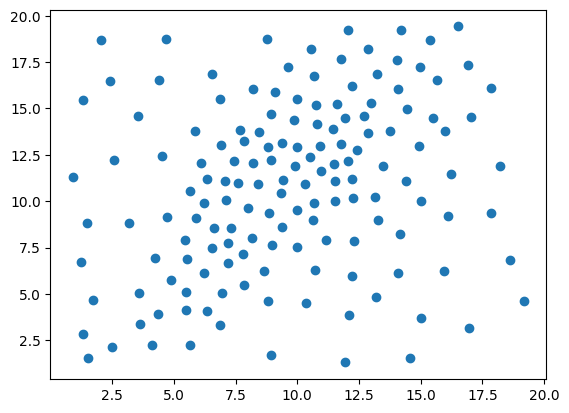

In [7]:
plt.scatter(x_reshape,y)

Calculatre the decision boundary based on the mean of the two exams

In [8]:
# In the loaded data we have 150 rows and 2 columnes. Assum the two columns are exams, then we can simulate some data randomly from the loaded dataset using numpy:
np.random.seed(0) # Setting a seed here, I want to be getting the same sequence of random numbers every time I run the program. This will help in keeping the decision boundary consistant
#  Generates numbers between 0 and 1 using np.random.rand(). This is a type of probability distribution where every value in the given range (in this case, every data is equally likely to be chosen., multiplying these values by 20 transforms the range to between 0 and 20.

x_reshape = np.random.rand(150, 2) * 20  # Exam1 and Exam2 scores between 0 and 20

# Simulate outcomes (1 for admit, 0 for reject), based on a rule: Exam1 + Exam2 > 20
y = np.where((x_reshape[:, 0] + x_reshape[:, 1]) > 20, 1, 0)  # Outcome


Plot the data and color it using your calculated decision 

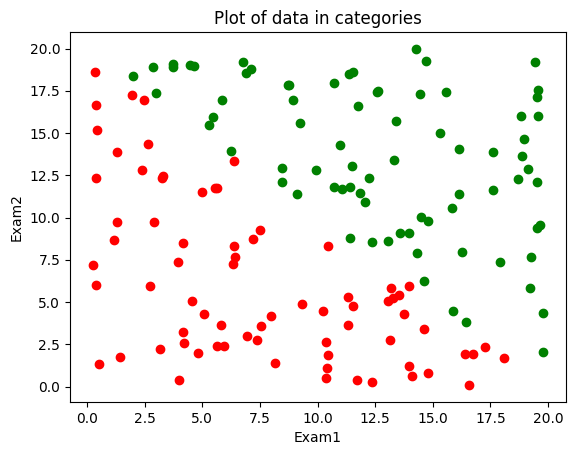

In [9]:

# Create a linear regression model
model = LinearRegression()

# Train the model using the data
model.fit(x_reshape, y)

# Plot the actual data points
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='green', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='red', label='Reject')

# Add labels and title
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Plot of data in categories')
# plt.legend()
plt.show()

Use a meshgrid to visualize the decision boundary as two spaces


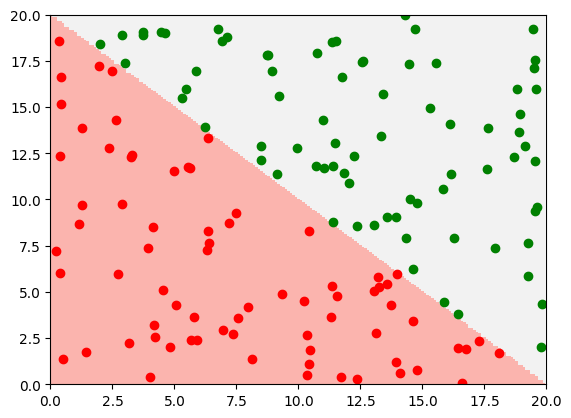

In [10]:
x_minimum, x_maximum = 0, 20
y_minimum, y_maximum = 0, 20
plot_step = 0.1
xx, yy = np.meshgrid(np.arange(x_minimum, x_maximum, plot_step),
                     np.arange(y_minimum, y_maximum, plot_step))

Z = (xx.ravel()+ yy.ravel()) / 2 > 10
Z = Z.reshape(xx.shape)
cs = plt.pcolormesh(xx, yy, Z, cmap="Pastel1")

plt.axis([0, 20, 0, 20])
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='green', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='red', label='Reject')
plt.show()

Now, load the data file 'College Admission Scores and Decisions.csv'

In [ ]:
admission = pd.read_csv("College Admission Scores and Decisions.csv",delimiter=";",decimal=".")
data2 = admission.to_numpy()
print(data2)

Make the same previous plot by replacing the color of your points by the decision data

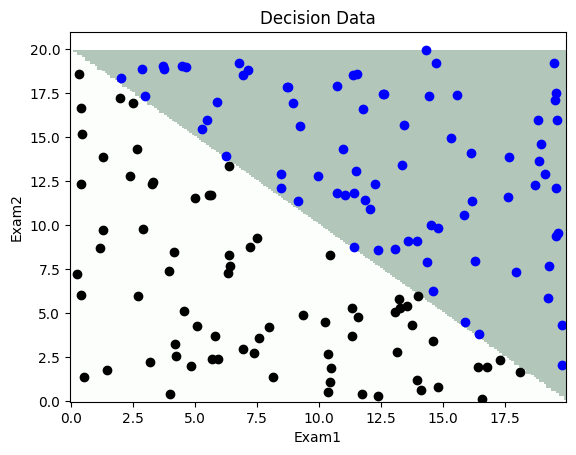

In [12]:
# Plot the decision boundary
plt.pcolormesh(xx, yy, Z, alpha=0.3, cmap="Greens")

# Plot the actual data points
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='blue', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='black', label='Reject')

# Add labels and title
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('Decision Data')
# plt.legend()
plt.show()

# Linear Discriminant Analysis

Create an LDA classifier and fit it over your data

In [13]:
# Import necessary libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# In the loaded data we have 150 rows and 2 columnes. Assum the two columns are exams, then we can simulate some data randomly from the loaded dataset using numpy:
np.random.seed(0) # Setting a seed here, I want to be getting the same sequence of random numbers every time I run the program. This will help in keeping the decision boundary consistant
#  Generates numbers between 0 and 1 using np.random.rand(). This is a type of probability distribution where every value in the given range (in this case, every data is equally likely to be chosen., multiplying these values by 20 transforms the range to between 0 and 20.

x = np.random.rand(150, 2) * 20  # Exam1 and Exam2 scores between 0 and 20

# Simulate outcomes (1 for admit, 0 for reject), based on a rule: Exam1 + Exam2 > 20
y = np.where((x_reshape[:, 0] + x_reshape[:, 1]) > 20, 1, 0)  # Outcome

# Create the LDA model
model = LDA()

# Fit the LDA model to your data
model.fit(x_reshape, y)

# Step 6: Predict outcomes (optional)
y_pred = model.predict(x_reshape)


Use a meshgrid to visualize the decision boundary of your LDA Classifier

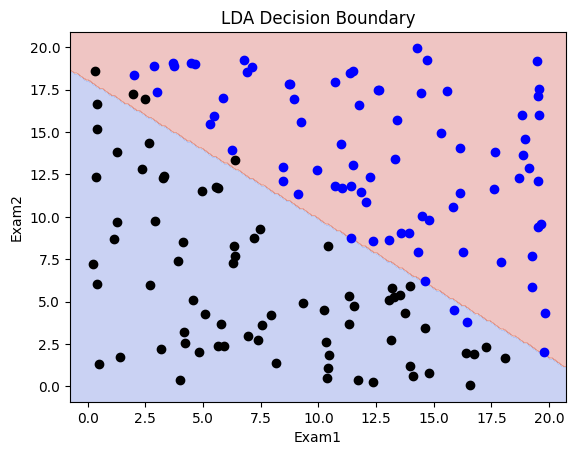

In [14]:
# Create a mesh grid to visualize decision boundaries
x_minimum, x_maximum = x_reshape[:, 0].min() - 1, x_reshape[:, 0].max() + 1
y_minimum, y_maximum = x_reshape[:, 1].min() - 1, x_reshape[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_minimum, x_maximum, 0.1),
                     np.arange(y_minimum, y_maximum, 0.1))

# Predict for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
# Plot the decision boundary and the actual points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='blue', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='black', label='Reject')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('LDA Decision Boundary')
# plt.legend()
plt.show()

What is its accuracy ?

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [16]:

# Simulate some data
np.random.seed(0)
x = np.random.rand(150, 2) * 20  # Generate 150 rows of data, each with 2 exam scores between 0 and 20
y = np.where((x[:, 0] + x[:, 1]) > 20, 1, 0)  # Admit if Exam1 + Exam2 > 20, else reject

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create the LDA model
model = LDA()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy of Linear Discriminant Analysis:", accuracy)




Accuracy of Linear Discriminant Analysis: 0.9333333333333333


What is the decision for a student with scores 19 and 0 ?

In [17]:
# Define the student's scores (Exam1 = 19, Exam2 = 0)
student_scores = np.array([[19, 1]])

# Predict the outcome using the trained LDA model
student_prediction = model.predict(student_scores)

# Output the result
if student_prediction == 1:
    print("Decision: Admit")
else:
    print("Decision: Reject")


Decision: Reject


---
# Quadratic Discriminant Analysis

Same questions...

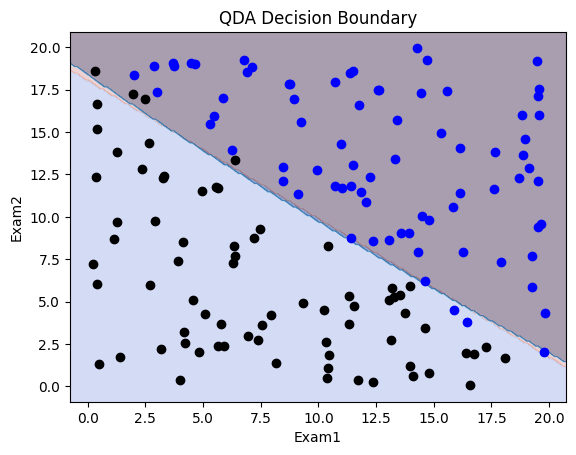

In [18]:

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Create a Quadratic Discriminant Analysis (QDA) model
model = QuadraticDiscriminantAnalysis()

# Train the QDA model using the data
model.fit(x_reshape, y)

# Step 9: Plot the decision boundary and the actual points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Predict for each point on the grid using the QDA model
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cs = plt.contourf(xx, yy, Z, alpha=0.3, cmap='Blues')

# Plot the actual data points
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='blue', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='black', label='Reject')

# Add labels and title
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('QDA Decision Boundary')
# plt.legend()
plt.show()




In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create a QDA model
model = QuadraticDiscriminantAnalysis()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Quadratic Discriminant Analysis:", accuracy)

Accuracy of Quadratic Discriminant Analysis: 0.9333333333333333


---
# Decisision Tree Classifier

Same questions

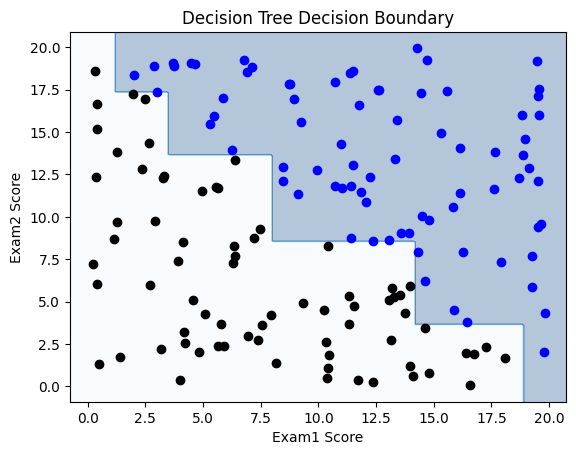

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier model
tree_model = DecisionTreeClassifier()

# Train the Decision Tree model using the data
tree_model.fit(x, y)

# Predict for each point on the grid using the Decision Tree model
Z = tree_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cs = plt.contourf(xx, yy, Z, alpha=0.3, cmap='Blues')
# Plot the actual data points
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='blue', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='black', label='Reject')
# Add labels and title
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.title('Decision Tree Decision Boundary')
# plt.legend()
plt.show()

In [21]:
# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Decision Tree:", accuracy)

Accuracy of Decision Tree: 0.9


---

# K-Nearest Neighbors Classifier (KNN)

Same questions

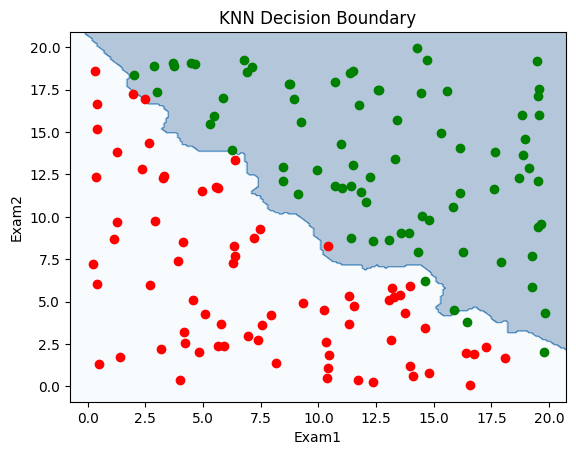

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# Create a K-Nearest Neighbors classifier (set k=5 for 5 neighbors)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model using the data
knn_model.fit(x, y)

# Predict for each point on the grid using the KNN model
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cs = plt.contourf(xx, yy, Z, alpha=0.3, cmap='Blues')

# Plot the actual data points
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='green', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='red', label='Reject')

# Add labels and title
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.title('KNN Decision Boundary')
# plt.legend()
plt.show()


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Create the KNN model (with k=3)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Train the KNN model
knn_model.fit(X_train, y_train)
# Predict the outcomes for the test data
y_pred = knn_model.predict(X_test)
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy
print("Accuracy of KNN classifier:", accuracy)

Accuracy of KNN classifier: 0.9666666666666667


---
# Random Forest Classifier

Same questions...

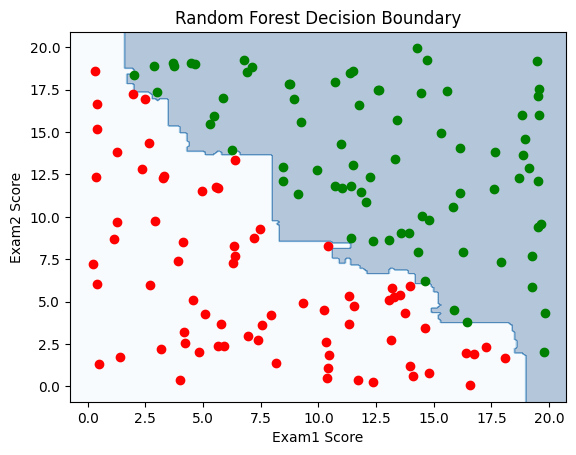

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
# Train the Random Forest model using the data
rf_model.fit(x_reshape, y)
# Predict for each point on the grid using the Random Forest model
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
cs = plt.contourf(xx, yy, Z, alpha=0.3, cmap='Blues')
# Plot the actual data points
plt.scatter(x_reshape[y == 1, 0], x_reshape[y == 1, 1], color='green', label='Admit')
plt.scatter(x_reshape[y == 0, 0], x_reshape[y == 0, 1], color='red', label='Reject')

# Add labels and title
plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score')
plt.title('Random Forest Decision Boundary')
# plt.legend()
plt.show()

In [27]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Create a Random Forest model
model = RandomForestClassifier(random_state=0)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Random Forest:", accuracy)


Accuracy of Random Forest: 0.9
